<a href="https://colab.research.google.com/github/Prayag79/Deep-learning/blob/main/02b_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
from google.colab import drive
drive.mount('/content/drive')   # Mount Google Drive

# Now set the root path inside your Drive
data_root = "/content/drive/MyDrive/ColabData"

Mounted at /content/drive


In [3]:
batch_size = 4

#normalising
transform  = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] #mean , std = .5 , .5
)

trainset = torchvision.datasets.CIFAR10(
    root = data_root,
    train = True,
    download = True,
    transform = transform
)

testset = torchvision.datasets.CIFAR10(
    root = data_root,
    train = False ,
    download = True,
    transform = transform
)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [22]:
trainloader = torch.utils.data.DataLoader(trainset , batch_size = batch_size,shuffle = True,num_workers = 2)
testloader = torch.utils.data.DataLoader(testset,batch_size = batch_size,num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

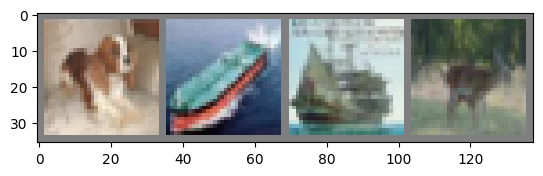

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img*0.5 + 0.5 #un-unoemalise
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images , labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))


In [6]:
#convolution neural network
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):
  def __init__(self) :
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)#conv layer (input channel , output channel , kernel size)
    self.pool = nn.MaxPool2d(2,2)#size 2x2 ; reduce size by half
    self.conv2 = nn.Conv2d(6,16,5)#another conv layer ( takes 6 input from conv1 and gives 16 output)

    #Fully connected dense layers
    self.fc1 = nn.Linear(16 * 5 * 5, 120)#input_size = 400 (16*5*5)--> conv 2 gives 16 and feature map is 5x5 this 400 , output = 120 thus this condensed 400 to 120
    self.fc2 = nn.Linear(120, 84)#---> 120 to 84
    self.fc3 = nn.Linear(84, 10)#---> 84 to 10 ( 10 cuz we have 10 classes)

  def forward(self,x):
    #output shape : out = in - kernal + 1
    x = self.pool(F.relu(self.conv1(x)))#relu replaces neg with 0 , adds non linearity keeping shape constant , pooling---> 2x2 window , reduces each dim by half ----> [bs,6,28,28]--->[bs,6,14,14]
    x = self.pool(F.relu(self.conv2(x)))#[bs,6,14,14]---->out = 14 + 5 - 1 = 10 ----> [bs,6,10,10]--->relu==non linearity-----> pooling ===
    x = torch.flatten(x,1) #flatten all dimensions except batch ---> shpae = [bs,400]
    x = F.relu(self.fc1(x))#non linear
    x = F.relu(self.fc2(x))#non linear
    x = self.fc3(x)# Each of the 10 values = score (logit) for each class
    return x

net = Net()


In [11]:
#Loss function and optimiser
criterion = nn.CrossEntropyLoss()#penalise wrong predition and turns raw op into probab.
optimizer = torch.optim.SGD(net.parameters(),lr = 0.001,momentum = 0.9)#updates the weights of the network based on the gradients from backpropagation.

In [17]:
#Train loop
epochs = 2
for epoch in range(epochs):
  net.train() #train mode


  running_loss = 0
  for i , data in enumerate(trainloader,0):
    inputsPATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH), labels = data

    optimizer.zero_grad() # reset grad
    outputs = net(inputs) #forward pass
    loss = criterion(outputs,labels) #loss
    loss.backward() #backward pass
    optimizer.step() #update weights

    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0




[1,  2000] loss: 2.254
[1,  4000] loss: 1.913
[1,  6000] loss: 1.698
[1,  8000] loss: 1.589
[1, 10000] loss: 1.530
[1, 12000] loss: 1.476
[2,  2000] loss: 1.406
[2,  4000] loss: 1.391
[2,  6000] loss: 1.352
[2,  8000] loss: 1.336
[2, 10000] loss: 1.318
[2, 12000] loss: 1.311


In [24]:
PATH = '/content/drive/MyDrive/cifar_net.pth'
torch.save(net.state_dict(), PATH)
from google.colab import drive
drive.mount('/content/drive')  # mount your Drive
PATH = '/content/drive/MyDrive/cifar_net.pth'
torch.save(net.state_dict(), PATH)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


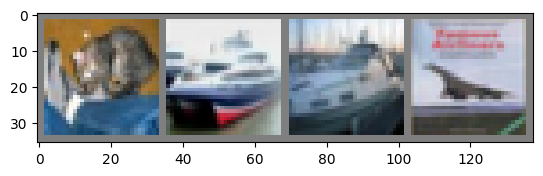

GroundTruth:  cat   ship  ship  plane


In [25]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [26]:
outputs = net(images)

In [33]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [34]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [35]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 56.5 %
Accuracy for class: car   is 76.8 %
Accuracy for class: bird  is 32.2 %
Accuracy for class: cat   is 48.2 %
Accuracy for class: deer  is 42.8 %
Accuracy for class: dog   is 32.0 %
Accuracy for class: frog  is 77.1 %
Accuracy for class: horse is 63.7 %
Accuracy for class: ship  is 65.6 %
Accuracy for class: truck is 44.3 %
